In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import *
from scipy.sparse.linalg import lsqr

# 1

coordinate system origin at center of M x M image

In [4]:
def construct_X(M, alphas, Np = None):
    if(Np == None):
        Np = np.ceil(np.sqrt(2) * M)
        
        if(Np % 2 == 0):  # if even add 1
            Np += 1
    
    D = M * M
    N = Np * len(alphas)
    alphas = np.deg2rad(alphas)
    a_0 = -(M - 1) / 2
    b_0 = -(M - 1) / 2

    s_0 = (Np - 1) / 2
    C_1, C_0 = np.mgrid[0:M, 0:M].astype(float)
    C_0 = C_0.flatten()
    C_1 = C_1.flatten()[::-1]
    C_0 += a_0
    C_1 += b_0
    C = np.array([C_0, C_1])

    i_indices = []
    j_indices = []
    weights = []
    
    for i_o, alpha in enumerate(alphas):
        n = np.array([np.cos(alpha), np.sin(alpha)])
        
        p = n.T @ C + s_0

        for pixel_index, hit_position in enumerate(p):
            sensor_index1 = np.floor(hit_position)
            sensor_index2 = np.ceil(hit_position)
            ray_intensity = hit_position - np.floor(hit_position)
            
            i_indices.extend([sensor_index1 + i_o * Np, sensor_index2 + i_o * Np])
            j_indices.extend([pixel_index, pixel_index])
            weights.extend([1 - ray_intensity, ray_intensity])        
    
    X = coo_matrix((weights, (i_indices, j_indices)), shape=(N, D), dtype = np.float32)
    return X

<div style="color: green; font-weight: bold">Same as solution except it sticks to the notation from the exercise</div>

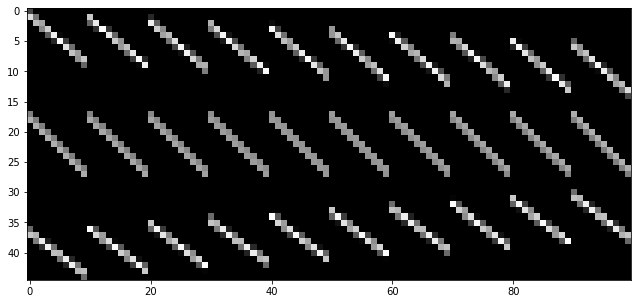

In [17]:
X = construct_X(10, [-33, 1, 42], 15)

plt.figure(figsize = (17,5))
plt.imshow(X.toarray(), cmap = "Greys_r", vmin = 0, vmax = 1)
plt.show()

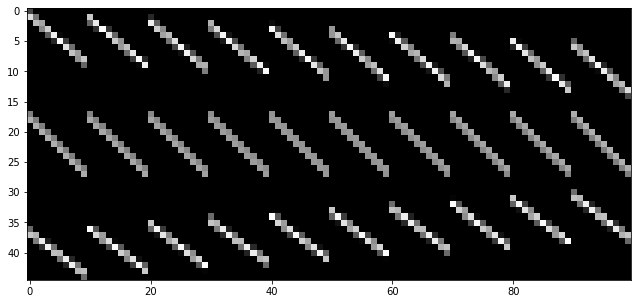

In [7]:
data = np.load("hs_tomography/X_example.npy")
plt.figure(figsize = (17,5))
plt.imshow(data, cmap = "Greys_r", vmin = 0, vmax = 1)
plt.show()

In [15]:
print((X.toarray() == data).all())

True


<div style="color: green; font-weight: bold">Same as solution</div>

# 2

In [2]:
alphas_77 = np.load("hs_tomography/alphas_77.npy")
alphas_195 = np.load("hs_tomography/alphas_195.npy")
y_77 = np.load("hs_tomography/y_77.npy")
y_195 = np.load("hs_tomography/y_195.npy")
X_77_compare= np.load("hs_tomography/X_77.npy", allow_pickle=True)

X_77_compare = csc_matrix(X_77_compare.all())

In [5]:
X_77 = construct_X(77, alphas_77, 109)
X_77 = X_77.tocsc()

In [47]:
print("number of nonzero elements: " + str(len(find(X_77)[0])))

number of nonzero elements: 1066978


<div style="color: green; font-weight: bold">The sparsity was not given in percent which is done by dividing the number of non-zero elements by the total number of elements</div>

In [44]:
result_77 = lsqr(X_77, y_77, atol=1e-08, btol=1e-08)
beta_77 = result_77[0].reshape(77, 77)

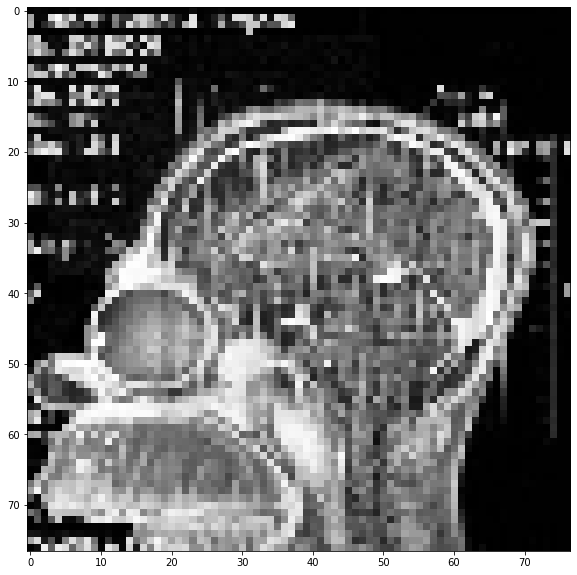

In [45]:
plt.figure(figsize = (10,10))
plt.imshow(beta_77, cmap = "Greys_r")
plt.show()

<div style="color: green; font-weight: bold">Same as solution</div>

now the bigger matrix and more data

In [78]:
X_195 = construct_X(195, alphas_195, 275)
X_195 = X_195.tocsc()

In [79]:
print("number of nonzero elements: " + str(len(find(X_195)[0])))

number of nonzero elements: 13535953


<div style="color: green; font-weight: bold">Same as above</div>

In [80]:
result_195 = lsqr(X_195, y_195, atol=1e-06, btol=1e-06)
beta_195 = result_195[0].reshape(195, 195)

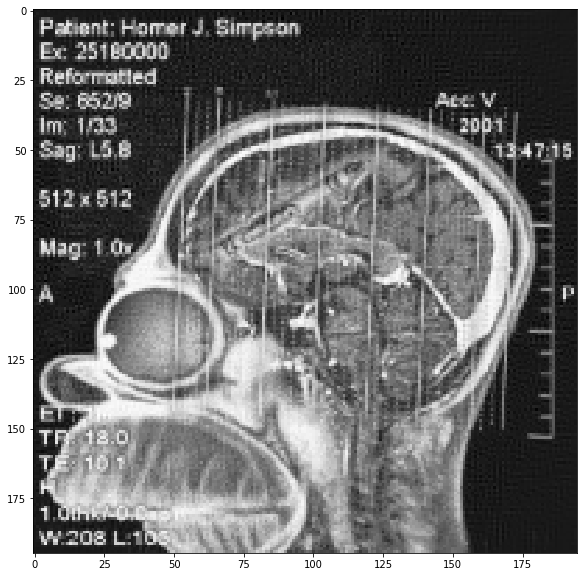

In [82]:
plt.figure(figsize = (10,10))
plt.imshow(beta_195, cmap = "Greys_r")
plt.show()

<div style="color: green; font-weight: bold">Same as solution, but no sinogram which was not asked for specifically I believe</div>

# 3

In [66]:
print(len(alphas_195[:91]))

91


In [84]:
X_195_half_angles = construct_X(195, alphas_195[:91], 275)
X_195_half_angles = X_195_half_angles.tocsc()

In [67]:
print(len(y_195))
print(275*179)
print(len(y_195[:91*275]))
print(X_195.shape)

49225
49225
25025
(25025, 38025)


In [85]:
result_195_half_angles = lsqr(X_195_half_angles, y_195[:91*275], atol=1e-06, btol=1e-06)
beta_195_half_angles = result_195_half_angles[0].reshape(195, 195)

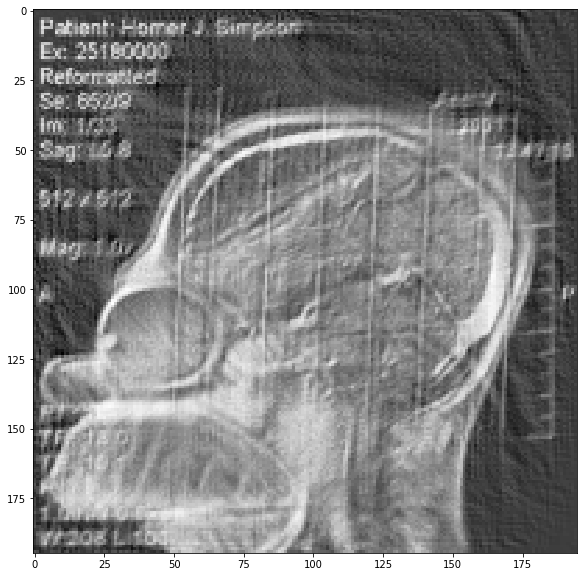

In [86]:
plt.figure(figsize = (10,10))
plt.imshow(beta_195_half_angles, cmap = "Greys_r")
plt.show()

<div style="color: green; font-weight: bold">This is not complete. We tried with half of the angles and the pencil can still be seen but more could have been done</div>